<a href="https://colab.research.google.com/github/marcelounb/DeepLearning/blob/master/India_vs_World_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![alt text](https://i.imgur.com/HWXuFrR.png)

#COVID-19 - Pandemic in India!

##About COVID-19

The **coronavirus (COVID-19)** pandemic has spread across 190 countries infecting 4.2 lakh people and killing 16,500 so far. In India, as many as 562 COVID-19 cases have been reported so far. Of these, 37 have recovered and 10 have died. 

On March 24, Prime Minister Narendra Modi annouced that the country would go under 21-day lackdown to combat the spread of the virus.
Infections are rapidly rising in Italy, France, Germany, Spain, United Kingdom and the United States. It has has a massive impact on the global economy and stock markets

The outbreak of COVID-19 is developing into a major international crisis, and it's starting to influence important aspects of daily life. For example in India:

- **Travel:** Complete lockdown no domestic or international flights are allowed in India for till next 21 days as decided by Ministry of Civil Aviation.
- **Grocery stores:** In highly affected areas, people are starting to stock up on essential goods leading to shortage of essential stuff.

**Corona Virus Explained in Simple Terms:**
- Let's say Raghav got infected yesterday, but he won't know it untill next 14 days
- Raghav thinks he is healthy but he is infecting 10 persons per day
- Now these 10 persons think they are completely healthy, they travel, go out and infect 100 others
- These 100 persons think they are healthy but they have already infected 1000 persons
- No one knows who is healthy or who can infect you
- All you can do is be responsible, stay in quarentine

##Problem Statement:

Its **25th March Afternoon** and India has reported its **9th** death with **562 total confirmed cases** due to COVID-19. Fresh cases from Manipur, Bihar, Gujrat, and Madhya Pradhesh have been reported by the Union Ministry of Health and Family Welfare. 
 
As the coronavirus outbreak continues to spread in the country, the question that we as Indians are trying to answer is : 

**"Will India be able to tackle this pandemic or are we going to witness another Italy/ S.Korea/ Wuhan?"**
### Goal:
We need a strong model that predicts how the virus could spread across different countries and regions. The goal of this task is to build a model that predicts the spread of the virus in the next 7 days.
###Tasks to be performed:
- Analysing the present condition in India
- Is this trend similar to Italy/S. Korea/ Wuhan
- Exploring the world wide data
- Forecasting the world wide COVID-19 cases using Prophet

###Importing the required libraries

In [5]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings  - To avoid matplotlib to plot in another window. Instead, it will plot in the same window.
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Part 1: Analysing the present condition in India


**How it started in India?:** 

The first **COVID-19** case was reported on 30th January 2020 when a student arrived **Kerala** from Wuhan. Just in next 2 days, Kerela reported 2 more cases. For almost a month, no new cases were reported in India, however, on 2nd March 2020, five new cases of corona virus were reported in Kerala again and since then the cases have been rising affecting **25** states, till now *(Bihar and Manipur being the most recent)*. Here is a brief timeline of the cases in India.
###COVID-19 in India - Timeline
 <br>


![](https://i.imgur.com/jUwp2jc.png)

##Recent COVID-19 cases in India: PM Modi Speech - 24th March

- **PM Narendra Modi** declared a three-week nationwide lockdown starting midnight Tuesday, explaining that it was the only way of breaking the Covid-19 infection cycle.
- Modi told people to **stay inside** their homes for **21 days**, warning that if they didn’t do so the country would be set back 21 years and families would be destroyed. 
- Modi later issued an appeal to the public to **stop panic buying** as people began crowding markets to stock up before the midnight deadline.
- The government also issued a notification that said **all essential services will remain open**, as before, and **all essential commodities and medicines would be available**. Banks, ATMs, petrol pumps, hospitals and grocery shops will continue to function. 
- **All transport services** — air, rail and roadways — will **remain suspended** until April 14.

## 1.1 Reading the Datasets


In [6]:
#Learn how to read a .xls file by creating a dataframe using pandas
# Reading the datasets
df= pd.read_excel('/content/Covid cases in India.xlsx')
df_india = df.copy()
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


In [0]:
# Coordinates of India States and Union Territories
India_coord = pd.read_excel('/content/Indian Coordinates.xlsx')

#Day by day data of India, Korea, Italy and Wuhan
dbd_India = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name='India')
dbd_Italy = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel('/content/per_day_cases.xlsx',parse_dates=True, sheet_name="Wuhan")

## 1.2 Analysing COVID19 Cases in India

In [8]:
#Learn how to play around with the dataframe and create a new attribute of 'Total Case'
#Total case is the total number of confirmed cases (Indian National + Foreign National)

df.drop(['S. No.'],axis=1,inplace=True)
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
print('Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020):', total_cases)


Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 562


In [9]:
#Learn how to highlight your dataframe
df.style.background_gradient(cmap='Reds')

,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death,Total cases
0,Andhra Pradesh,9,0,0,0,9
1,Bihar,3,0,0,1,3
2,Chhattisgarh,1,0,0,0,1
3,Delhi,30,1,6,1,31
4,Gujarat,32,1,0,1,33
5,Haryana,14,14,11,0,28
6,Himachal Pradesh,3,0,0,1,3
7,Karnataka,41,0,3,1,41
8,Kerala,101,8,4,0,109
9,Madhya Pradesh,9,0,0,0,9


**Visualization Inference:** 
* Manipur and Mizoram reports thier first case. 
* Kerela has crossed Maharashtra in terms of highest number of confirmed cases.
* Haryana and Telengana has the highest count of confirmed Foreign National count.
* Till 25th of March 9 people have died in India
* Kerala, Maharashtra, and karnataka are currently TOP 3 states with maximum number of confirmed cases

## 1.3 Number of Active COVID-19 cases in affected State/Union Territories   

In [10]:
#Total Active  is the Total cases - (Number of death + Cured)
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID 2019 cases across India:', total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases across India: 512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


## 1.4 Visualising the spread geographically

In [11]:
# Learn how to use folium to create a zoomable map
df_full = pd.merge(India_coord,df,on='Name of State / UT')
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total cases'], df_full['Name of State / UT']):
    folium.CircleMarker([lat, lon], radius=value*0.8, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## 1.5 Confirmed vs Recovered figures

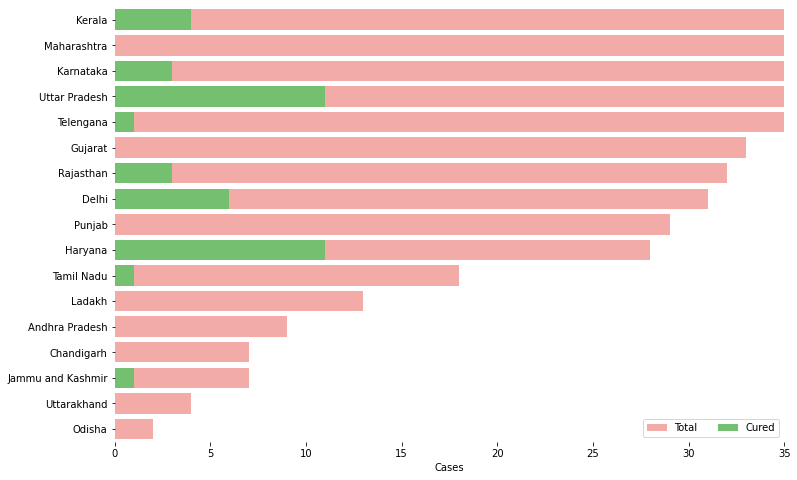

In [12]:
#Learn how to use Seaborn for visualization
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Name of State / UT','Total cases','Cured','Death']]
data.sort_values('Total cases',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Total cases", y="Name of State / UT", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Cured", y="Name of State / UT", data=data, label="Cured", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

## 1.6 How the Coronavirus cases are rising?

In [0]:
#This cell's code is required when you are working with plotly on colab
import plotly
plotly.io.renderers.default = 'colab'

In [14]:
#Learn how to create interactive graphs using plotly
# import plotly.graph_objects as go
# Rise of COVID-19 cases in India
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_India['Date'], y = dbd_India['Total Cases'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# New COVID-19 cases reported daily in India

import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')

fig.show()

# Part 2: Is the trend similar to Italy/ S.Korea/ Wuhan?


India has already crossed 562 cases. It is very important to contain the situation in the coming 21 days.The numbers of coronavirus patients starting doubling after these countries hit the 100 mark and almost starting increasing exponentially.

## 2.1 Cumulative cases in India, Italy, S.Korea, and Wuhan

In [15]:
# import plotly.express as px
fig = px.bar(dbd_India, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

###Visualization Inference
- Confirmed cases in India is rising exponentially with no fixed pattern (Very less test in India)
- Confirmed cases in Italy is rising exponentially with certain fixed pattern
- Confirmed cases in S.Korea is rising gradually
- There has been only 3 confirmed cases in Wuhan since last week. They have almost controlled the COVID-19
 

###Recent Updates from Wuhan
- China on Tuesday decided to lift the three-month lockdown on more than 56 million people in the central Hubei province.
- Bus services began in Wuhan for the first time since January 23 as a bus departed from its terminus at Hankou railway station at 5:25 am on Wednesday
- The prolonged lockdown of Hubei's capital Wuhan will end on April 8, lifting the mass quarantine over the city with a population of over 11 million.

## 2.2 Comparison between the rise of cases in Wuhan, S.Korea, Italy and India

In [16]:
#Learn how to create subplots using plotly
# import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("S.Korea","Italy", "India","Wuhan"))

fig.add_trace(go.Bar(x=dbd_Korea['Date'], y=dbd_Korea['Total Cases'],
                    marker=dict(color=dbd_Korea['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=dbd_Italy['Date'], y=dbd_Italy['Total Cases'],
                    marker=dict(color=dbd_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=dbd_India['Date'], y=dbd_India['Total Cases'],
                    marker=dict(color=dbd_India['Total Cases'], coloraxis="coloraxis")),2, 1)

# fig.add_trace(go.Bar(x=dbd_Wuhan['Date'], y=dbd_Wuhan['Total Cases'],
#                     marker=dict(color=dbd_Wuhan['Total Cases'], coloraxis="coloraxis")),2, 2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed cases(Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

## 2.3 Trend after crossing 100 cases

In [17]:
# import plotly.graph_objects as go

title = 'Main Source for News'
labels = ['S.Korea', 'Italy', 'India']
colors = ['rgb(122,128,0)', 'rgb(255,0,0)', 'rgb(49,130,189)']

mode_size = [10, 10, 12]
line_size = [1, 1, 8]

fig = go.Figure()


fig.add_trace(go.Scatter(x=dbd_Korea['Days after surpassing 100 cases'], 
                 y=dbd_Korea['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=dbd_Italy['Days after surpassing 100 cases'], 
                 y=dbd_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))

fig.add_trace(go.Scatter(x=dbd_India['Days after surpassing 100 cases'], 
                 y=dbd_India['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
    
    
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')

fig.show()


**Visualization Inference:** 

* Above graph depicts the number of days after the COVID-19 cases crosses 100 vs total number of cases in each country. 
* Both Italy and S.Korea have crossed the mark of 5600 in the next 13 days.
* Number of cases detected(trend) in India is less as compared to Italy and S.Korea

##2.4 Why is India testing so little?


[CNN Report](hhttps://www.bbc.com/news/amp/world-asia-india-51922204)
###**Why is a densely populated country with more than a billion people testing so little?** 

The official assumption is the disease has still not spread in the community. As early "evidence" health authorities say 826 samples collected from patients suffering from acute respiratory disease from 50 government hospitals across India between 1 and 15 March tested negative for coronavirus. Also, hospitals have not yet reported a spike in admissions of respiratory distress cases.

"It is reassuring that at the moment there is no evidence of community outbreak," says Balram Bhargava, director of the Indian Council of Medical Research (ICMR). He believes Mr Ghebreyesus's advice is "premature" for India, and it would only "create more fear, more paranoia and more hype".

**But experts are not so sure.**

Many of them believe India is also testing below scale because it fears that its under-resourced and uneven public health system could be swamped by patients. India could be buying time to stock up on testing kits and add isolation and hospital beds. "I know mass testing is not a solution, but our testing appears to be too limited. We need to quickly expand to restrict community transmission," K Sujatha Rao, former federal health secretary and author of But Do We Care: India's Health System.

**India** has eight doctors per 10,000 people compared to 41 in **Italy** and 71 in **Korea**. It has one state-run hospital for more than 55,000 people. (Private hospitals are out of reach for most people). India has a poor culture of testing, and most people with flu symptoms do not go to doctors and instead try home remedies or go to pharmacies. There's a scarcity of isolation beds, trained nursing staff and medics, and ventilators and intensive care beds.
###India poor testing rate masked coronavirus cases: [Report](https://www.aljazeera.com/news/2020/03/india-poor-testing-rate-masked-coronavirus-cases-200318040314568.html)


#Part 3:  Exploring World wide data


In [0]:
df = pd.read_csv('/content/covid_19_clean_complete.csv',parse_dates=['Date'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")
df_recovered = pd.read_csv("/content/time_series_covid19_recovered_global.csv")
df_deaths = pd.read_csv("/content/time_series_covid19_deaths_global.csv")

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [19]:
df_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
df.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [21]:
df2 = df.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
df2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,2020-01-22,Australia,Australian Capital Territory,0.0,0.0,0.0
1,2020-01-22,Australia,From Diamond Princess,0.0,0.0,0.0
2,2020-01-22,Australia,New South Wales,0.0,0.0,0.0
3,2020-01-22,Australia,Northern Territory,0.0,0.0,0.0
4,2020-01-22,Australia,Queensland,0.0,0.0,0.0


In [22]:
# Check for India's data
df.query('Country=="India"').groupby("Date")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0
...,...,...,...,...
57,2020-03-19,194.0,4.0,15.0
58,2020-03-20,244.0,5.0,20.0
59,2020-03-21,330.0,4.0,23.0
60,2020-03-22,396.0,7.0,27.0


In [23]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0


## 3.1 Visualizing: Worldwide NCOVID-19 cases  

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [25]:
fig = go.Figure()
#Plotting datewise confirmed cases
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Confirmed'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines+markers', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))

fig.show()

#Part 4: Forecasting Total Number of Cases Worldwide



## Prophet
Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

We use Prophet, a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. 

## Why Prophet?

* **Accurate and fast:**  Prophet is used in many applications across Facebook for producing reliable forecasts for planning and goal setting. Facebook finds it to perform better than any other approach in the majority of cases. It fit models in [Stan](https://mc-stan.org/) so that you get forecasts in just a few seconds.

* **Fully automatic:** Get a reasonable forecast on messy data with no manual effort. Prophet is robust to outliers, missing data, and dramatic changes in your time series.

* **Tunable forecasts:** The Prophet procedure includes many possibilities for users to tweak and adjust forecasts. You can use human-interpretable parameters to improve your forecast by adding your domain knowledge

* **Available in R or Python:** Facebook has implemented the Prophet procedure in R and Python. Both of them share the same underlying Stan code for fitting. You can use whatever language you’re comfortable with to get forecasts. 


## References 
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet
- https://facebook.github.io/prophet/docs/quick_start.html

In [0]:
from fbprophet import Prophet

In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

The input to Prophet is always a dataframe with two columns: **ds** and **y**. The **ds (datestamp)** column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [0]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [29]:
confirmed.tail()

,ds,y
57,2020-03-19,242708.0
58,2020-03-20,272166.0
59,2020-03-21,304524.0
60,2020-03-22,335955.0
61,2020-03-23,336004.0



##4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [30]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


The **predict** method will assign each row in future a predicted value which it names **yhat**. If you pass in historical dates, it will provide an in-sample fit. The **forecast object** here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [31]:
#predicting the future with date, and upper and lower limit of y value
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872975,333574.540553,374965.020684
65,2020-03-27,372235.326938,351360.111816,392170.421979
66,2020-03-28,388674.964143,367902.477734,410168.867517
67,2020-03-29,405307.954675,383703.134669,427900.952407
68,2020-03-30,418529.648466,397104.488770,440509.734398


You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

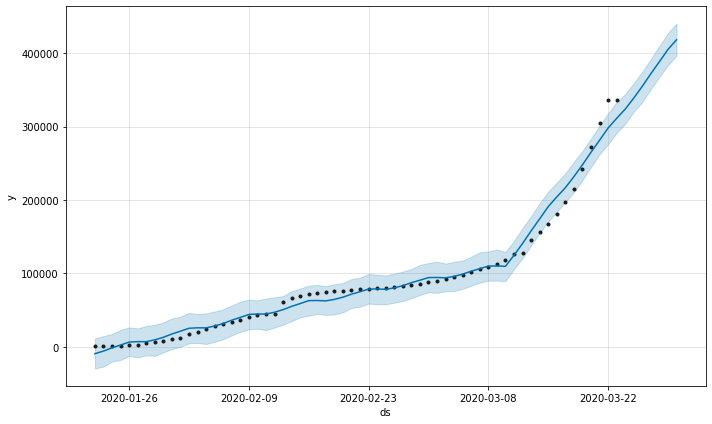

In [32]:
confirmed_forecast_plot = m.plot(forecast)

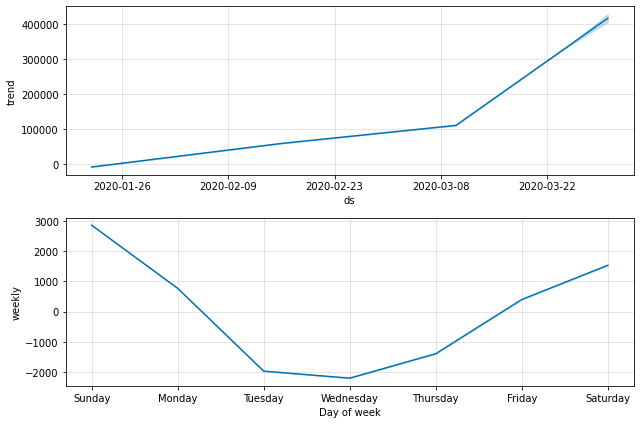

In [33]:
confirmed_forecast_plot =m.plot_components(forecast)

## What do you think was the reason behind calling Janta Curfew on 22nd March and country lockdown from 24th March till next 21 days?


- **PM Modi** announced Janta Curfew in India on 22nd March. From 24th March there is a complete lockdown the entire country. Definately its for our own good.
![alt text](https://i.imgur.com/bP2Rf9b.png)

- No scheduled international commercial flight's paasenger shall be allowed to land in india from March 22 for a week.
- From 24th midnight all the domestic and international flights have been called off.

![alt text](https://i.imgur.com/P9z3TVL.png)

##4.2 Forecasting Worldwide Deaths using Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [35]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [36]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14389.725893,16359.675265
65,2020-03-27,16199.617603,15239.143193,17171.449943
66,2020-03-28,17006.904589,16027.614979,17992.181323
67,2020-03-29,17831.505383,16755.164361,18875.288621
68,2020-03-30,18490.986176,17469.167823,19638.494814


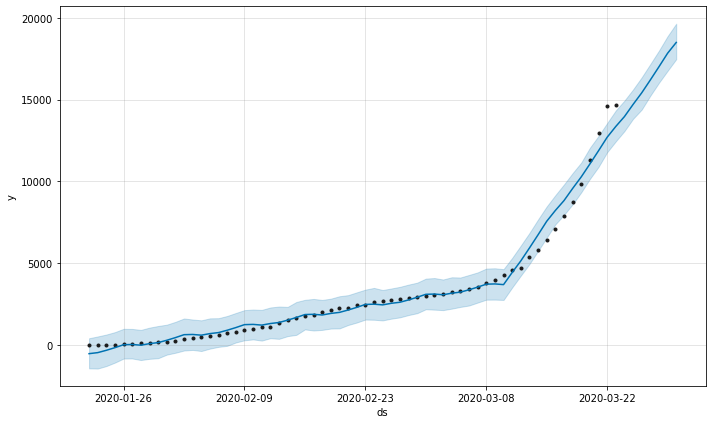

In [37]:
deaths_forecast_plot = m.plot(forecast)

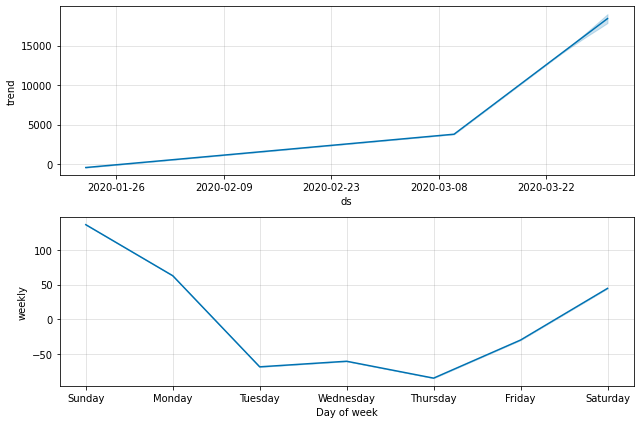

In [38]:
deaths_forecast_plot = m.plot_components(forecast)

##4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [0]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [40]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [41]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.351662,101339.254119,104829.565155
65,2020-03-27,105338.025042,103475.476133,107274.489486
66,2020-03-28,108256.310813,106182.972012,110273.880586
67,2020-03-29,111119.296170,108752.089994,113473.556252
68,2020-03-30,113244.961749,110532.943137,116191.712168


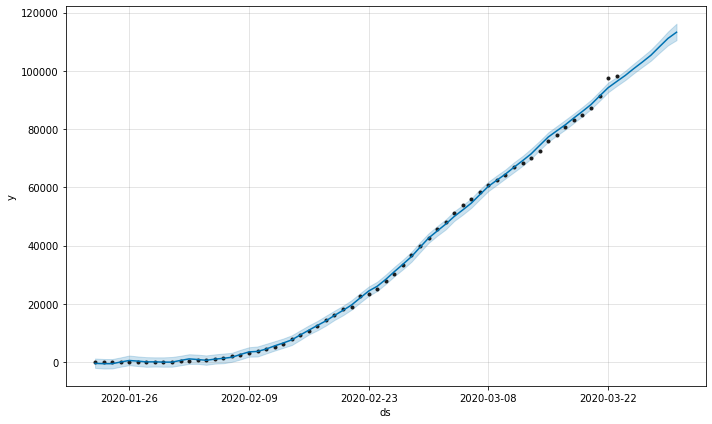

In [42]:
recovered_forecast_plot = m.plot(forecast)

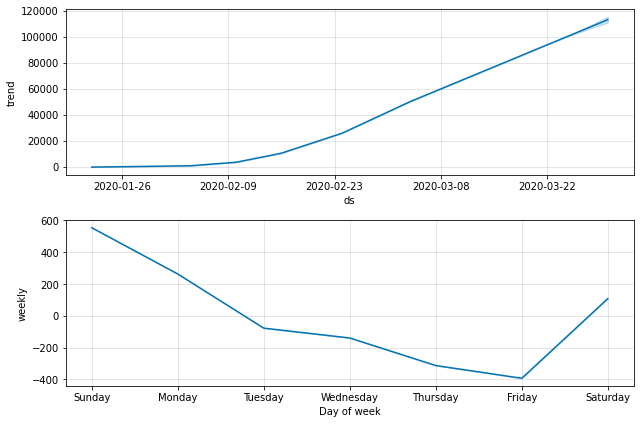

In [43]:
recovered_forecast_plot = m.plot_components(forecast)


##4.4 Inference from the above Analysis and Forecast
###Will Indian become the next Italy/ S.Korea/ Wuhan?


Yes, if you look at the world's data and its forecast you can say that India might face one of its worst days if we are not taking strict measures against COVID-19.

###**A Humble Request to all our YouTube viewers please TEST, TEST, TEST: COVID-19** 
Don't take your cough and cold lighly as before. If you look at the data number of cases in India is rising but not like in Italy, Wuhan, S.Korea, Spain, or USA. Don't get fool by these numbers (COVID cases in India). I think the number is less because of low awareness and less tests being conducted in India. Currently India is a deadly and risky zone as there are very few COVID-19 test centres in India.  Imagine how many infected people are still around you and are infecting others unknowingly. Remember **India ranks 145** in terms of global healthcare rank while [Italy is on 2nd](https://worldpopulationreview.com/countries/best-healthcare-in-the-world/).


- Indian government's decision for today confirms that the above prediction is definitely something we pay attention to.
- Please stay home/indoors for all 21 days. This will definitely help us tackle the situation. It won't stop the pandemic, but it would definitely help us reduce the exponential rate at which it is increasing. 
- Let's give a hand in fighting this pandemic atleast by quarantining ourselves by staying indoors and protecting you and your family. 
- Go and get a checkup done in case you are suffering from cough,cold, fever, shortness of breath and breathing difficulties. Can't tell for sure but(due to lack of data) , but it might be possible that we don't have the exact number of the COVID-19 cases in India becasuse sometimes it takes weeks to see the first sign/symptom for it. 
- If you're not getting the checkup done, you might add in spreading the virus unintentionally
- Its time we take this pandemic seriously - **LIVE & HELP OTHERS LIVE**
- Take precautions, stay indoors, and utilize this time to develop your machine learning skill with edureka's AI-ML PGP and help the world with your machine learning models.

### Indian streets today!
![alt text](https://i.imgur.com/jIE1kro.jpg)

- Nature is sending us a message with the coronavirus pandemic and the ongoing climate crisis, according to the UN’s environment chief, Inger Andersen.
- Think on a positive side, this lockdown will help the environment to heal better, reduce different kinds of pollution, and improve air quality


#COVID-19 Symptoms


![alt text](https://i.imgur.com/POA1WGb.png)

#**Data Source:**
- https://www.mohfw.gov.in/
- https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset